### Import Necessary Modules

In [1]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

### Load and Preprocess the CIFAR-10 Dataset

In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

print(f"Train shape: {trainX.shape}, Test shape: {testX.shape}")

Train shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)


### Build the CNN with MobileNet Backbone

In [3]:
def build_mobilenet_cnn(input_shape, num_classes):
    mobilenet = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')

    for layer in mobilenet.layers:
        layer.trainable = False

    inputs = mobilenet.input
    x = mobilenet.output
    x = Flatten(name='Flatten')(x)
    x = Dense(256, activation='relu', name='DenseLayer1')(x)
    outputs = Dense(num_classes, activation='softmax', name='OutputLayer')(x)

    model = Model(inputs, outputs, name='MobileNet_CNN')
    model.summary()
    return model

### Train the Model (Transfer Learning Only)

In [4]:
mobilenet_cnn = build_mobilenet_cnn(input_shape=(32, 32, 3), num_classes=10)
mobilenet_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_transfer = mobilenet_cnn.fit(trainX, trainY, validation_split=0.1, epochs=10, batch_size=32)

/var/folders/60/w69mbd6n6h96wgjgmc08kzk40000gn/T/ipykernel_28810/706785951.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')


Model: "MobileNet_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,493,834 (13.33 MB)

 Trainable params: 264,970 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1931 - loss: 2.1976 - val_accuracy: 0.2290 - val_loss: 2.1345
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2248 - loss: 2.1348 - val_accuracy: 0.2326 - val_loss: 2.1275
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.2256 - loss: 2.1306 - val_accuracy: 0.2356 - val_loss: 2.1112
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2363 - loss: 2.1165 - val_accuracy: 0.2388 - val_loss: 2.1118
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.2352 - loss: 2.1164 - val_accuracy: 0.2406 - val_loss: 2.1072
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.2372 - loss: 2.1113 - val_accuracy: 0.2352 - val_loss: 2.1083
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2398 - loss: 2.1042 - val_accuracy: 0.2346 - val_loss: 2.1102
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.2346 -

### Evaluate the Model

In [5]:
test_loss_transfer, test_acc_transfer = mobilenet_cnn.evaluate(testX, testY)
print(f"Test Accuracy (Transfer Learning Only): {test_acc_transfer}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2292 - loss: 2.1249
Test Accuracy (Transfer Learning Only): 0.23019999265670776


### Fine-Tune the Model (Transfer Learning + Fine-Tuning)

In [6]:
for layer in mobilenet_cnn.layers[-20:]:
    layer.trainable = True

mobilenet_cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune = mobilenet_cnn.fit(trainX, trainY, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 39ms/step - accuracy: 0.3284 - loss: 10.0017 - val_accuracy: 0.4698 - val_loss: 1.6576
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.4874 - loss: 1.5237 - val_accuracy: 0.5640 - val_loss: 1.3065
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.5783 - loss: 1.2142 - val_accuracy: 0.6164 - val_loss: 1.1519
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.6332 - loss: 1.0424 - val_accuracy: 0.6392 - val_loss: 1.0743
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.6730 - loss: 0.9247 - val_accuracy: 0.6582 - val_loss: 1.0448
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.7065 - loss: 0.8356 - val_accuracy: 0.6704 - val_loss: 0.9902
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.7259 - loss: 0.7760 - val_accuracy: 0.6790 - val_loss: 0.9841
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.7546 

### Evaluate the Model

In [7]:
test_loss_finetune, test_acc_finetune = mobilenet_cnn.evaluate(testX, testY)
print(f"Test Accuracy (Transfer Learning + Fine-Tuning): {test_acc_finetune}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6882 - loss: 0.9676
Test Accuracy (Transfer Learning + Fine-Tuning): 0.6855999827384949


### Compare Results

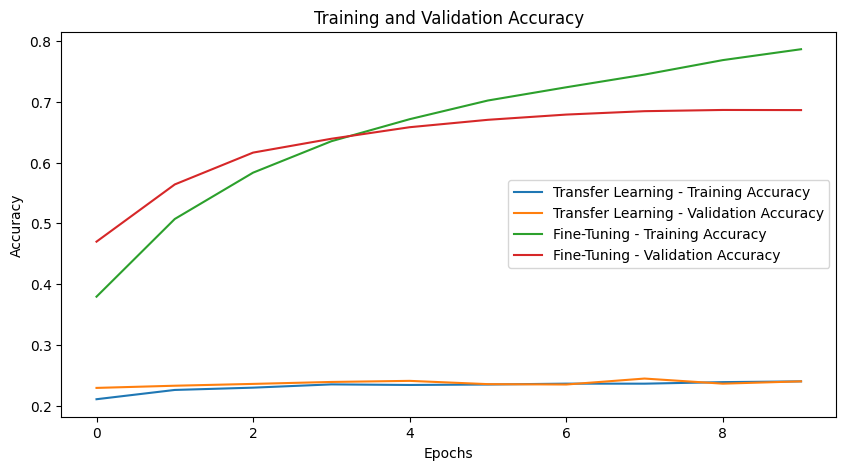

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history_transfer.history['accuracy'], label='Transfer Learning - Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning - Validation Accuracy')
plt.plot(history_finetune.history['accuracy'], label='Fine-Tuning - Training Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Fine-Tuning - Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()